## Influence of the closing angle on the current peak in a simple R-L circuit

In [1]:
#importing all required modules
#important otherwise pop-up window may not work
%matplotlib inline 
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import *
import seaborn

from ipywidgets import interact

#bokeh
from bokeh.plotting import figure, output_file, output_notebook, show

Auxiliary variables definition

In [2]:
# RMS value of voltage
u = 230 

#time vector
t = np.linspace(0,0.08, 100)

#frequency & angular frequency
f = 50
omega = 2 * pi * f

#Resitance
R = 5

#Inductance
L = 0.1
XL = 2*pi*f*L

#Phase angle
phi=atan(XL/R)

#closing angle [rad]
alpha = 0

In [3]:
print ("Reactance value:", XL) 
print ("Phase angle value:", phi)

Reactance value: 31.415926535897935
Phase angle value: 1.4129651365067377


Definition of voltages

In [4]:
ua = [sqrt(2)*u*sin(omega*k + alpha) for k in t]
ub = [sqrt(2)*u*sin(omega*k + 2*pi/3 + alpha) for k in t]
uc = [sqrt(2)*u*sin(omega*k - 2*pi/3 +alpha) for k in t]

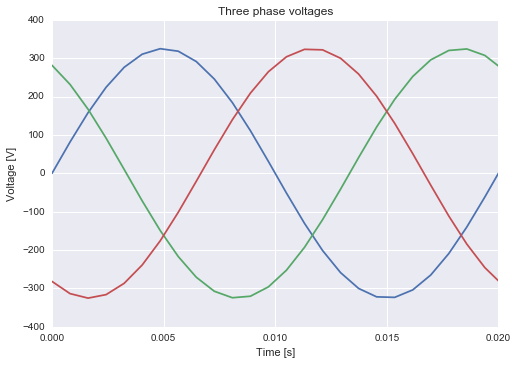

In [5]:
plt.plot(t,ua,t,ub,t,uc)
plt.title("Three phase voltages")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.axis([0, 0.02, -400, 400])
plt.grid(True)

Definition of the current in phase A, B and C

In [6]:
#Phase A
#Current response
ia = [(sqrt(2)*u/(sqrt(R**2+XL**2))*(sin(omega*k+alpha-phi)-sin(alpha-phi)*exp(-R/L*k))) for k in t]

#DC component of the current
iadc = [(sqrt(2)*u/(sqrt(R**2+XL**2))*-sin(alpha-phi)*(exp(-R/L*k))) for k in t]

#AC steady state current
iau = [(sqrt(2)*u/(sqrt(R**2+XL**2))*sin(omega*k+alpha-phi)) for k in t]

#Phase B
#Current response
ib = [(sqrt(2)*u/(sqrt(R**2+XL**2))*(sin(omega*k+alpha-phi+4*pi/3)-sin(alpha-phi+4*pi/3)*exp(-R/L*k))) for k in t]

#DC component of the current
ibdc = [(sqrt(2)*u/(sqrt(R**2+XL**2))*-sin(alpha-phi+4*pi/3)*(exp(-R/L*k))) for k in t]

#AC steady state current
ibu = [(sqrt(2)*u/(sqrt(R**2+XL**2))*sin(omega*k+alpha-phi+4*pi/3)) for k in t]

#Phase C
#Current response
ic = [(sqrt(2)*u/(sqrt(R**2+XL**2))*(sin(omega*k+alpha-phi+2*pi/3)-sin(alpha-phi+2*pi/3)*exp(-R/L*k))) for k in t]

#DC component of the current
icdc = [(sqrt(2)*u/(sqrt(R**2+XL**2))*-sin(alpha-phi+2*pi/3)*(exp(-R/L*k))) for k in t]

#AC steady state current
icu = [(sqrt(2)*u/(sqrt(R**2+XL**2))*sin(omega*k+alpha-phi+2*pi/3)) for k in t]

In [7]:
def kresl(t, i, idc, iu, phase):
    fig, ax = plt.subplots()
    
    ax.plot(t, i, label="final current")
    ax.plot(t, idc, label="aperiodic component")
    ax.plot(t, iu, label="periodic component")
    ax.set_ylabel("Current [A]")
    ax.set_xlabel("Time [s]")
    ax.set_title("Current in " + phase)
    ax.legend()

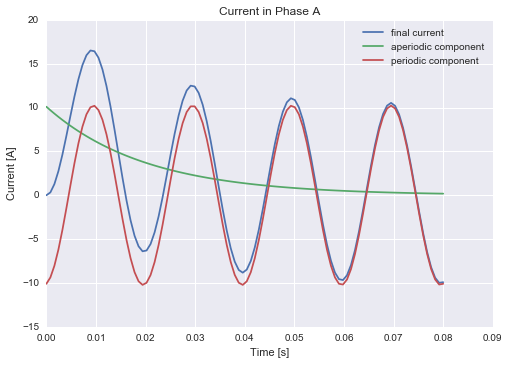

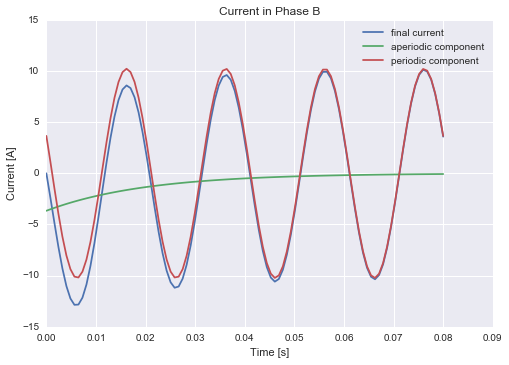

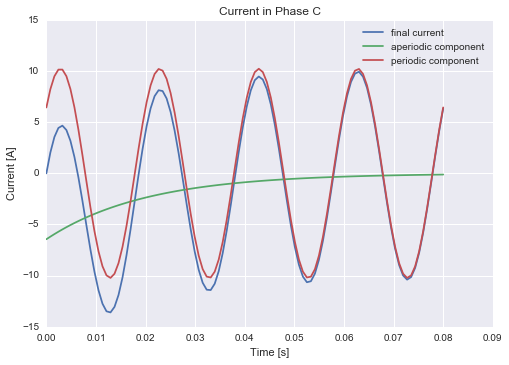

In [8]:
kresl(t, ia, iadc, iau, "Phase A")
kresl(t, ib, ibdc, ibu, "Phase B")
kresl(t, ic, icdc, icu, "Phase C")

In [9]:
def kresl2(t, i, idc, iu, phase):
    fig, ax = plt.subplots()
    
    ax.plot(t, i, label="final current")
    ax.plot(t, idc, label="aperiodic component")
    ax.plot(t, iu, label="periodic component")
    ax.set_ylabel("Current [A]")
    ax.set_xlabel("Time [s]")
    ax.set_title("Current in " + phase)
    ax.legend()
    ax.axis([0, 0.08, -30, 30])

In [10]:
def current(u, alpha):
    t = np.linspace(0,0.08, 100)
    #Current response
    i = [(sqrt(2)*u/(sqrt(R**2+XL**2))*(sin(omega*k+alpha-phi)-sin(alpha-phi)*exp(-R/L*k))) for k in t]

    #DC component of the current
    idc = [(sqrt(2)*u/(sqrt(R**2+XL**2))*-sin(alpha-phi)*(exp(-R/L*k))) for k in t]

    #AC steady state current
    iu = [(sqrt(2)*u/(sqrt(R**2+XL**2))*sin(omega*k+alpha-phi)) for k in t]
    
    kresl2(t, i, idc, iu, "Phase A")

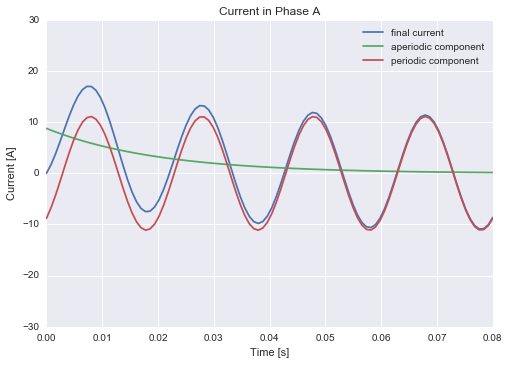

In [11]:
interact(current, u=(100,400), alpha=(0,phi))

In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
p = figure(plot_width=400, plot_height=400)
p.line(t,ia, color="navy", line_width=2, legend="final current")
p.line(t,iau, color="red", line_width=1, legend="periodic component")
p.line(t,iadc, color="green", line_width=1, legend="aperiodic component")
show(p)